<a href="https://colab.research.google.com/github/deepu718/tensorflow_practice/blob/main/02_neural_network_multi_class_classifiction_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Working with a larger example (multiclass classifiction)

when you have more than two classes as an option, it's known as **multi-class classifcation**.
  * This means if you have 3 different classes, it's multi-class classifiction.
  * it also means if you have 100 differnet classes, its multi-class classification

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
# show the first training example
print(f'Training sample:\n{train_data[0]}')
print(f'Training label:\n{train_labels[0]}')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [3]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

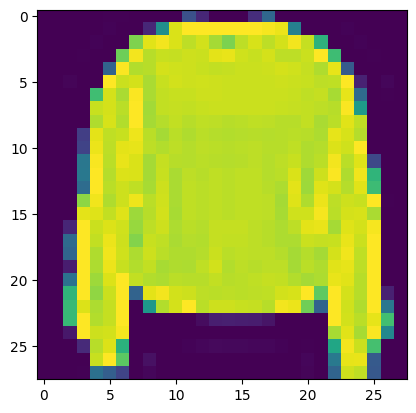

In [4]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [5]:
# Check out the samples label
train_labels[7]

2

In [6]:
# Create a small list so we can index onto our training labels so they are human readable
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

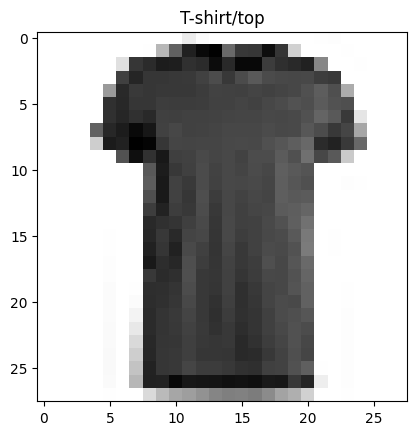

In [9]:
# plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

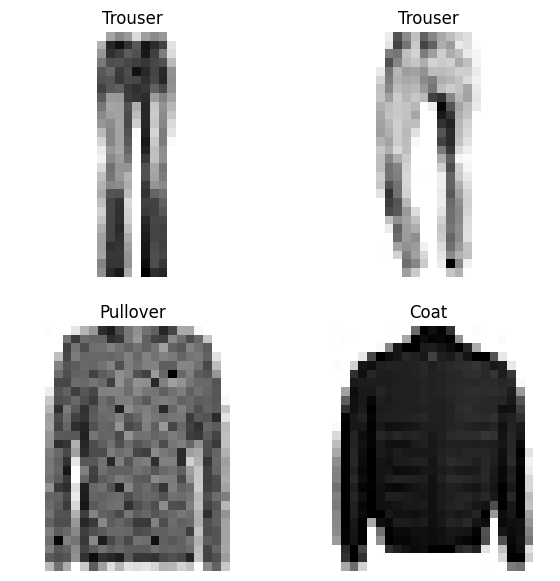

In [12]:
# plot multiple random images
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

for our multi-class classification model, we can use a similar architechture we can use a similar architechture to our binary classifiers, however we're going to have to tweak few things:
  * Input shape = 28 x 28(the shape of one image)
  * Output shape = 10(one per class of clothing)
  * Loss function = tf.keras.losses.CategoricalCrossentropy()
      * if your labels are one_hot encoded use CategoricalCrossentropy.
      * if your labels are integers use SparseCategoricalCrossentrpy
  * Output layer activation = Softmax

In [17]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
non_norm_history = model_1.fit(train_data,tf.one_hot(train_labels,depth=10),epochs=10,validation_data=(test_data,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 2.5389 - accuracy: 0.1077 - val_loss: 2.2598 - val_accuracy: 0.1199
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2493 - accuracy: 0.1257 - val_loss: 2.2012 - val_accuracy: 0.1459
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1979 - accuracy: 0.1506 - val_loss: 2.1724 - val_accuracy: 0.1513
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1479 - accuracy: 0.1640 - val_loss: 2.0318 - val_accuracy: 0.2229
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7053 - accuracy: 0.3083 - val_loss: 1.5909 - val_accuracy: 0.3530
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4758 - accuracy: 0.3929 - val_loss: 1.3994 - val_accuracy: 0.4125
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3652 - accuracy: 0.4209 - val_loss: 1.3863 - val_accuracy:

In [18]:
# Check the model summary
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 4)                 3140      
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Check the min max values of the training data
train_data.min(),train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1

In [21]:
# we can get out training data and testing data between 0 & 1 by divdng by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [30]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# compile the model
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
norm_history = model_2.fit(train_data_norm,
                               tf.one_hot(train_labels,depth=10),
                               epochs=10,
                               validation_data=(test_data_norm,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0700 - accuracy: 0.6299 - val_loss: 0.7388 - val_accuracy: 0.7553
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6800 - accuracy: 0.7678 - val_loss: 0.6706 - val_accuracy: 0.7738
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6245 - accuracy: 0.7861 - val_loss: 0.6318 - val_accuracy: 0.7852
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5994 - accuracy: 0.7952 - val_loss: 0.6240 - val_accuracy: 0.7858
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5860 - accuracy: 0.7997 - val_loss: 0.6145 - val_accuracy: 0.7895
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5744 - accuracy: 0.8037 - val_loss: 0.6142 - val_accuracy: 0.7934
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5672 - accuracy: 0.8058 - val_loss: 0.6208 - val_accuracy:

<Axes: title={'center': 'normalized data'}>

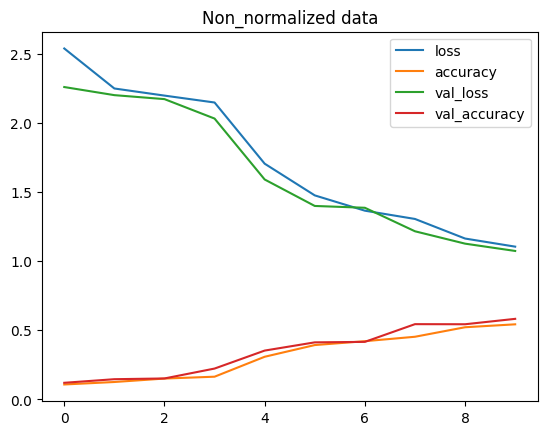

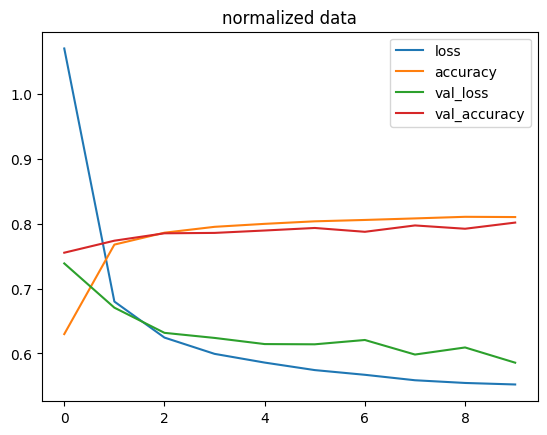

In [31]:
import pandas as pd
# plot the non norm data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non_normalized data")
pd.DataFrame(norm_history.history).plot(title="normalized data")


In [32]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# compile the model
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Create the learing rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
# Fit the model
find_lr_history = model_3.fit(train_data_norm,
                               tf.one_hot(train_labels,depth=10),
                               epochs=40,
                               validation_data=(test_data_norm,tf.one_hot(test_labels,depth=10)),
                           callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1486 - accuracy: 0.6167 - val_loss: 0.6863 - val_accuracy: 0.7450 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6213 - accuracy: 0.7680 - val_loss: 0.6172 - val_accuracy: 0.7739 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5656 - accuracy: 0.8002 - val_loss: 0.6018 - val_accuracy: 0.7907 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5404 - accuracy: 0.8142 - val_loss: 0.5593 - val_accuracy: 0.8059 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5262 - accuracy: 0.8181 - val_loss: 0.5667 - val_accuracy: 0.8003 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5157 - accuracy: 0.8224 - val_loss: 0.5585 - val_accuracy: 0.8079 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 8s

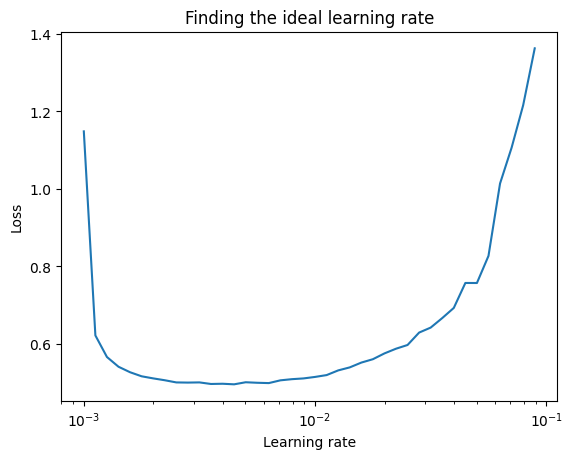

In [33]:
# PLot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [34]:
# Let's refit a model with the ideal learing rate

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# compile the model
model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(train_data_norm,
                               tf.one_hot(train_labels,depth=10),
                               epochs=20,
                               validation_data=(test_data_norm,tf.one_hot(test_labels,depth=10)))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6464 - accuracy: 0.3873 - val_loss: 1.2495 - val_accuracy: 0.5082
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0954 - accuracy: 0.5716 - val_loss: 0.9688 - val_accuracy: 0.6313
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8738 - accuracy: 0.6521 - val_loss: 0.8436 - val_accuracy: 0.6559
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7912 - accuracy: 0.6980 - val_loss: 0.7815 - val_accuracy: 0.7264
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7240 - accuracy: 0.7501 - val_loss: 0.7417 - val_accuracy: 0.7415
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6706 - accuracy: 0.7713 - val_loss: 0.7197 - val_accuracy: 0.7565
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6396 - accuracy: 0.7804 - val_loss: 0.6658 - val_accuracy: